# Laboratory 2: Computer Vision

# Part 1: MNIST Digit Classification

In [23]:
import comet_ml
import os
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv())
COMET_API_KEY = os.getenv("COMET_API_KEY")
assert COMET_API_KEY != "", "Please insert your Comet API Key"

In [47]:
import tensorflow as tf
import mitdeeplearning as mdl
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

In [25]:
comet_ml.init(project_name="mit_lab2_part1_NN")
comet_model_1 = comet_ml.Experiment()

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: tensorflow, keras.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/friend09/mit-lab2-part1-nn/17a922e944ec488a8a01d84b8e60929e



## 1.1 MNIST

In [26]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = (np.expand_dims(train_images, axis=-1) / 255.0).astype(np.float32)
train_labels = (train_labels).astype(np.int64)

test_images = (np.expand_dims(test_images, axis=-1) / 255.0).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

{'web': 'https://www.comet.com/api/image/download?imageId=9af83ab277a94b7caa5f979e583f2498&experimentKey=17a922e944ec488a8a01d84b8e60929e',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=9af83ab277a94b7caa5f979e583f2498&experimentKey=17a922e944ec488a8a01d84b8e60929e',
 'imageId': '9af83ab277a94b7caa5f979e583f2498'}

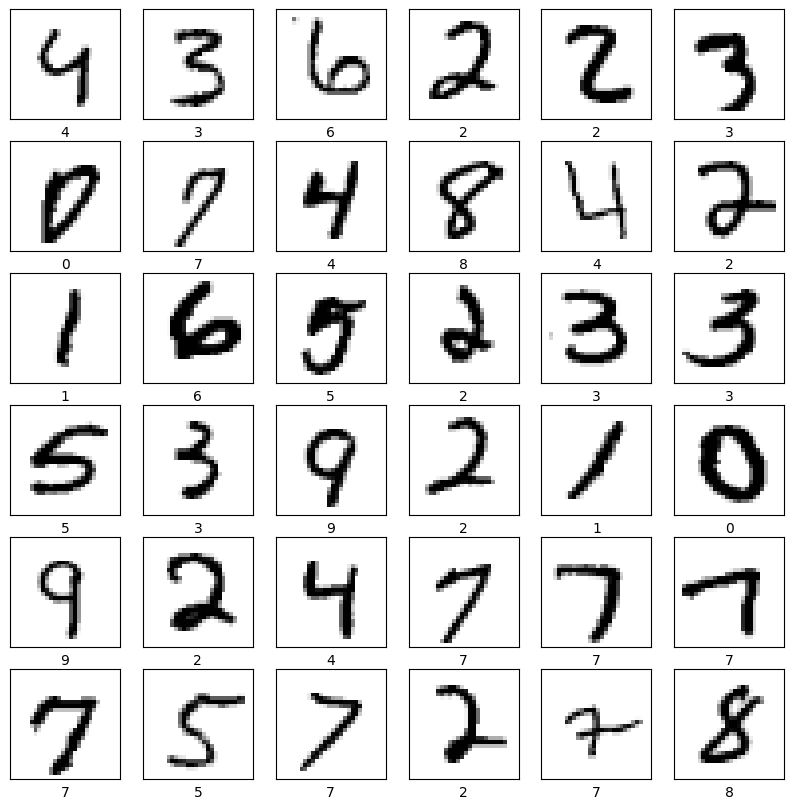

In [27]:
plt.figure(figsize=(10, 10))
random_inds = np.random.choice(60000, 36)

for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]  # get image indices
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])
comet_model_1.log_figure(figure=plt)

## 1.2 NN

In [28]:
def build_fc_model():
    fc_model = tf.keras.Sequential(
        [
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(10, activation="softmax"),
        ]
    )
    return fc_model


model = build_fc_model()

In [29]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [30]:
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

comet_model_1.end()

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - accuracy: 0.8361 - loss: 0.5890
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.9395 - loss: 0.2117
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - accuracy: 0.9542 - loss: 0.1623
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - accuracy: 0.9639 - loss: 0.1248
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - accuracy: 0.9688 - loss: 0.1101


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : prospective_curd_7861
COMET INFO:     url                   : https://www.comet.com/friend09/mit-lab2-part1-nn/17a922e944ec488a8a01d84b8e60929e
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     figures                  : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (105.04 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: 
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: tensorf

In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.9623 - loss: 0.1220
Test accuracy: 0.9677000045776367


## 1.3 CNN

In [32]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential(
        [
            tf.keras.layers.Conv2D(24, (3, 3), activation="relu"),
            tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
            tf.keras.layers.Conv2D(36, (3, 3), activation="relu"),
            tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(10, activation="softmax"),
        ]
    )
    return cnn_model

In [35]:
train_images[[0]].shape

(1, 28, 28, 1)

In [36]:
cnn_model = build_cnn_model()
cnn_model.predict(train_images[[0]])

cnn_model.summary()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (1, 26, 26, 24)        │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (1, 13, 13, 24)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (1, 11, 11, 36)        │         7,812 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (1, 5, 5, 36)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (1, 900)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (1, 128)               │       115,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (1, 10)                │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,670 (486.99 KB)

 Trainable params: 124,670 (486.99 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
comet_ml.init(project_name="mit-lab2-part1-CNN")
comet_model_2 = comet_ml.Experiment()

cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: tensorflow, keras.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/friend09/mit-lab2-part1-cnn/6d4ea18b192c410a9239941505b2d0e5



In [38]:
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8775 - loss: 0.4074
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9833 - loss: 0.0551
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9897 - loss: 0.0355
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9903 - loss: 0.0294
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9935 - loss: 0.0213


In [39]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9821 - loss: 0.0472


0.9866999983787537

In [40]:
predictions = cnn_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [43]:
predictions[0]

array([8.9799830e-09, 8.2695919e-07, 1.3207249e-06, 1.0102004e-06,
       5.3197731e-09, 9.3723695e-10, 2.1161522e-13, 9.9999511e-01,
       1.2126577e-08, 1.8311913e-06], dtype=float32)

In [44]:
prediction = np.argmax(predictions[0])
prediction

7

Label of this digit is: 7


{'web': 'https://www.comet.com/api/image/download?imageId=fe58881be5104d4d83df1f7c70339af0&experimentKey=6d4ea18b192c410a9239941505b2d0e5',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=fe58881be5104d4d83df1f7c70339af0&experimentKey=6d4ea18b192c410a9239941505b2d0e5',
 'imageId': 'fe58881be5104d4d83df1f7c70339af0'}

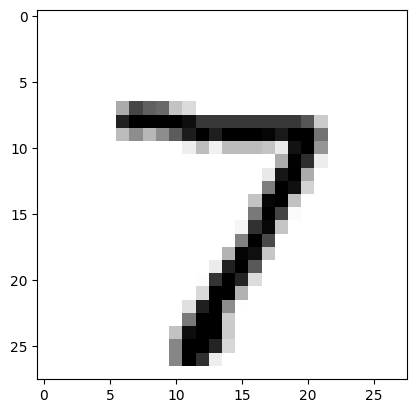

In [45]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0, :, :, 0], cmap=plt.cm.binary)
comet_model_2.log_figure(figure=plt)

{'web': 'https://www.comet.com/api/image/download?imageId=ebdff7c58bd94453b39bc4100ecfb8a6&experimentKey=6d4ea18b192c410a9239941505b2d0e5',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=ebdff7c58bd94453b39bc4100ecfb8a6&experimentKey=6d4ea18b192c410a9239941505b2d0e5',
 'imageId': 'ebdff7c58bd94453b39bc4100ecfb8a6'}

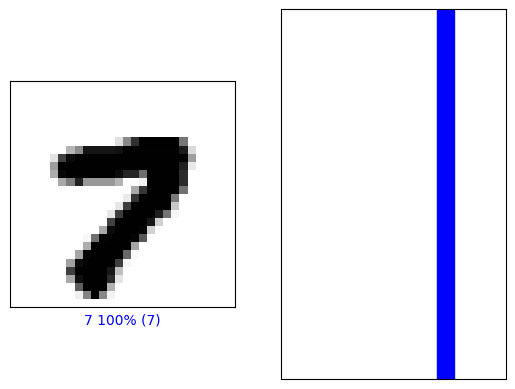

In [48]:
# @title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 79  # @param {type:"slider", min:0, max:100, step:1}
plt.subplot(1, 2, 1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
mdl.lab2.plot_value_prediction(image_index, predictions, test_labels)
comet_model_2.log_figure(figure=plt)

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : just_cantaloupe_5517
COMET INFO:     url                   : https://www.comet.com/friend09/mit-lab2-part1-cnn/6d4ea18b192c410a9239941505b2d0e5
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     figures                  : 3
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (120.14 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: 
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: tensorf

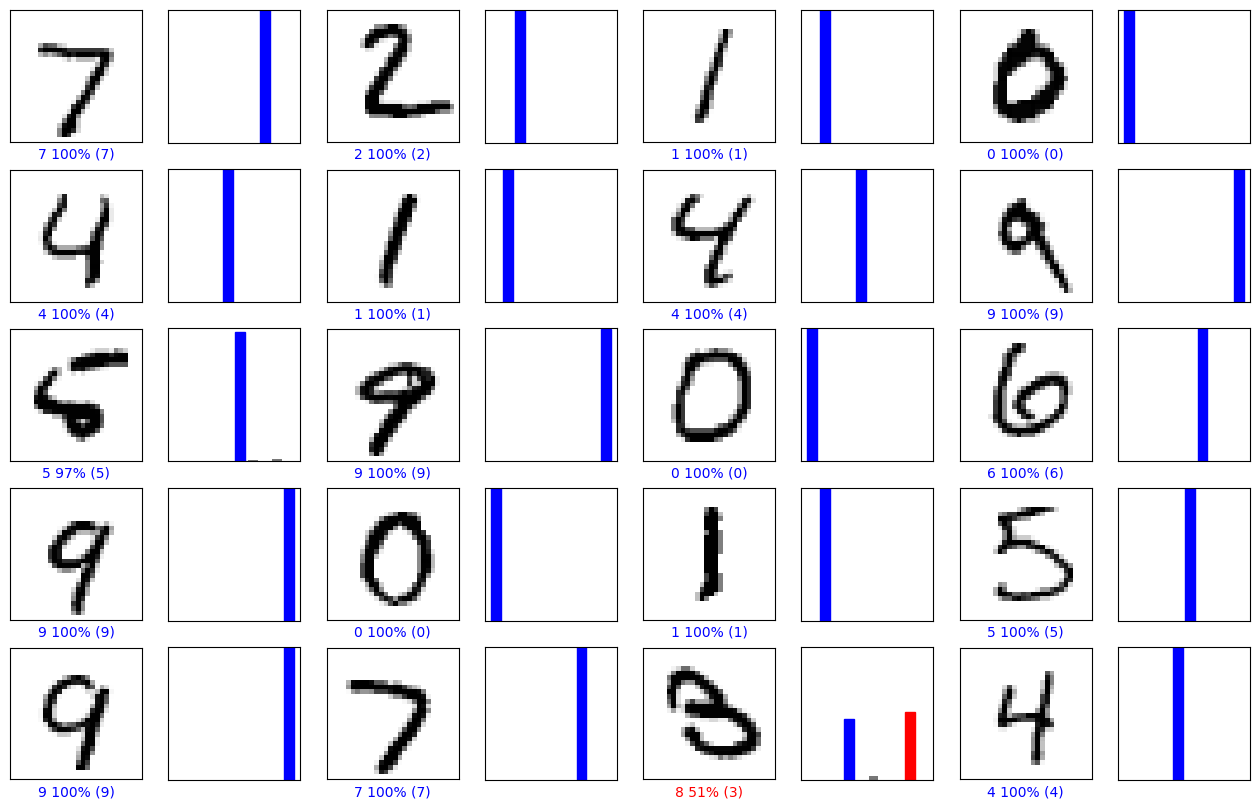

In [49]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    mdl.lab2.plot_value_prediction(i, predictions, test_labels)
comet_model_2.log_figure(figure=plt)
comet_model_2.end()

## 1.4

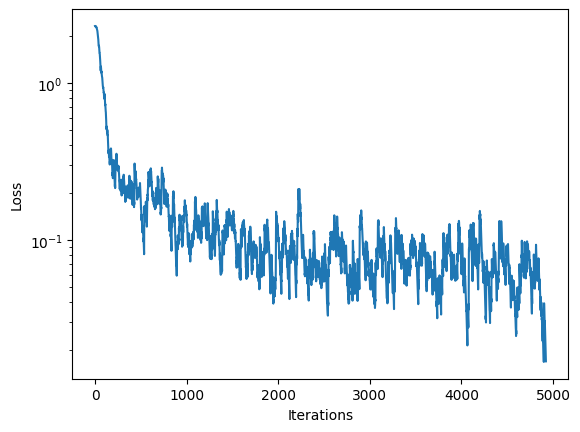

100%|██████████| 5000/5000 [00:49<00:00, 100.69it/s]
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : growing_restaurant_3640
COMET INFO:     url                   : https://www.comet.com/friend09/6-s191lab2-part1-cnn2/140fc3dadf5849c4ae1a2d35088a1205
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [5000] : (2.4356852009077556e-05, 2.551734209060669)
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     figures                  : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (196.51 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook          

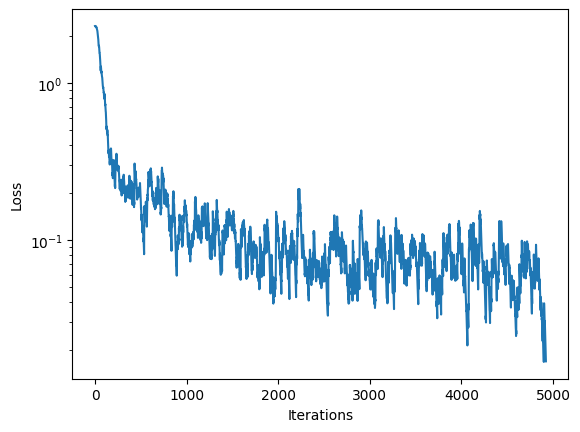

In [50]:
# Rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(
    smoothing_factor=0.95
)  # to record the evolution of the loss
plotter = mdl.util.PeriodicPlotter(
    sec=2, xlabel="Iterations", ylabel="Loss", scale="semilogy"
)
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2)  # define our optimizer

comet_ml.init(project_name="6.s191lab2_part1_CNN2")
comet_model_3 = comet_ml.Experiment()

if hasattr(tqdm, "_instances"):
    tqdm._instances.clear()  # clear if it exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
    # First grab a batch of training data and convert the input images to tensors
    (images, labels) = (
        train_images[idx : idx + batch_size],
        train_labels[idx : idx + batch_size],
    )
    images = tf.convert_to_tensor(images, dtype=tf.float32)

    # GradientTape to record differentiation operations
    with tf.GradientTape() as tape:
        #'''TODO: feed the images into the model and obtain the predictions'''
        logits = cnn_model(images)
        # logits = # TODO

        #'''TODO: compute the categorical cross entropy loss
        loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)
        comet_model_3.log_metric("loss", loss_value.numpy().mean(), step=idx)
        # loss_value = tf.keras.backend.sparse_categorical_crossentropy('''TODO''', '''TODO''') # TODO

    loss_history.append(
        loss_value.numpy().mean()
    )  # append the loss to the loss_history record
    plotter.plot(loss_history.get())

    # Backpropagation
    """TODO: Use the tape to compute the gradient against all parameters in the CNN model.
      Use cnn_model.trainable_variables to access these parameters."""
    grads = tape.gradient(loss_value, cnn_model.trainable_variables)
    # grads = # TODO
    optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))

comet_model_3.log_figure(figure=plt)
comet_model_3.end()